# missing Completely at random

What does MCAR mean?

ANS:- Working at any kind of dataset if there are missing values like we have in this particular dataset of titanic ... we have atmost three columns where the data is missing. so what does MCAR means here is that ... Refer to missing values age,cabin and Embarked. so embarked does not have any relationship between the age and cabin group. so this is the example of MCAR.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [8]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


##### 2. Not missing at random(NMAR):- Systematic missing values

There is absolutely some relationship between the data missing and any other values.

In [9]:
import numpy as np

In [10]:
# where ever there is nan values replacing it by 1 and if there are not any then value=0
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

#mean is just for %

df['cabin_null'].mean()

df['cabin_null'].head()

0    1
1    0
2    1
3    0
4    1
Name: cabin_null, dtype: int64

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [12]:
df.groupby(['Survived'])[('cabin_null')].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### 3.misssing at random

# All the techniques of handling missing values.

1.mean/median/mode replacement
2.Random Sample Imputation
3.Capturing nan values with new feature
4.End of Distribution imputation
5.Arbitrary Imputation
6.Frequent category Imputation


1. Mean/median Imputation

when should we apply?

it has the assumption that the data are missing completely at random(MCAR).

we solve this by replacing the NAN values with the most frequent occurance of the variables.



In [13]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
## the percentage of the missing values.
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
def impute_nan(df,variable,median):
    df[variable+"_median"] =  df[variable].fillna(median)

In [16]:
median =  df.Age.median()

In [17]:
median

28.0

In [18]:
impute_nan(df,'Age',median)
df.head()


,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [19]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

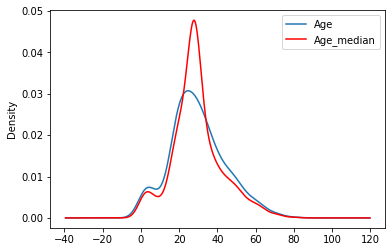

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Missing Values

In [24]:
import pandas as pd

In [27]:
df = pd.read_csv('train.csv', usecols =['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [30]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [32]:
df['Age'].isnull().sum()

177

In [33]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [39]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [40]:
def impute_nan(df,variable,median):
    df[variable+"_median"] =  df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    #it will have random sample to fill na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [42]:
median = df.Age.median()

In [43]:
median

28.0

In [44]:
impute_nan(df,"Age",median)

In [45]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

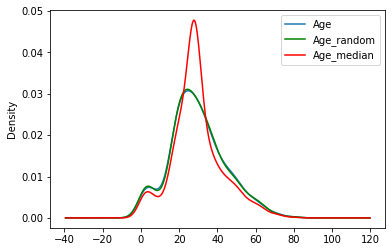

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='green')
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [50]:
import numpy as np

In [51]:
df = pd.read_csv('train.csv', usecols =['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [56]:
df.Age.median()

28.0

In [58]:
df["Age"].fillna(df.Age.median(),inplace=True)

In [60]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# End of Distribution Imputation

In [65]:
df = pd.read_csv('train.csv', usecols =['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

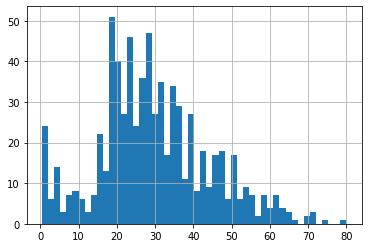

In [67]:
df.Age.hist(bins=50)

In [71]:
extreme = df.Age.mean()+3*df.Age.std()

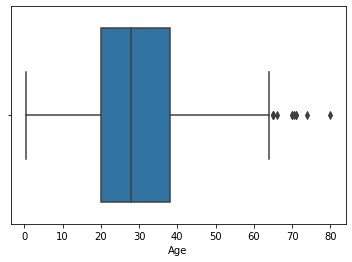

In [70]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [72]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [73]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [74]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


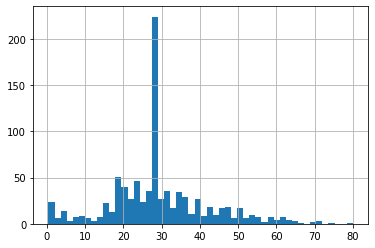

In [75]:
df['Age'].hist(bins=50)

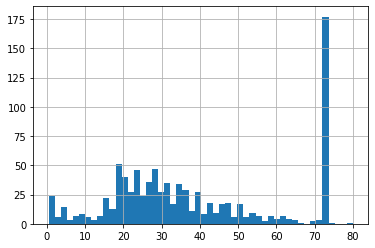

In [76]:
df['Age_end_distribution'].hist(bins=50)

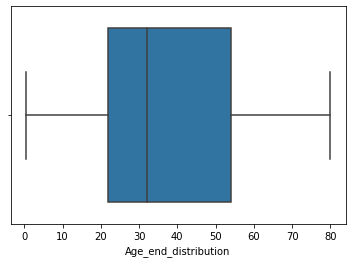

In [77]:
sns.boxplot('Age_end_distribution',data=df)

# Arbitrary Value Imputation

This Technique was derived from Kaggle Competition . It consists of the method to replace the NAN values by arbitrary values.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', usecols =['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,variable):
    df[variable+"_Zero"]=df[variable].fillna(0)
    df[variable+"_Hundred"]=df[variable].fillna(100)